In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [607]:
DATA_PATH = '/dlabdata1/turkish_wiki'

# Preprocessing edits for analysis

In [614]:
edits = pd.read_csv(f'{DATA_PATH}/processed_data/account_edits.csv', index_col = 0)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
block_dates = [pd.to_datetime('2017-04-29', utc = True), pd.to_datetime('2020-01-15', utc = True)]

In [613]:
edits.head()

,event_type,event_timestamp,event_user_id,event_user_groups,event_user_revision_count,event_user_seconds_since_previous_revision,page_id,page_title,page_revision_count,revision_minor_edit,revision_text_bytes,revision_text_bytes_diff,revision_is_identity_revert
1,create,2002-12-05 22:54:39+00:00,1,NaN,1,NaN,5,Main_Page,1,False,24,24,False
14,create,2003-03-13 16:30:04+00:00,6,NaN,1,NaN,10,Cengiz_Han,1,False,8540,8540,False
51,create,2003-08-02 01:08:44+00:00,13,NaN,2,303.0,24,Linux,1,False,257,257,False
52,create,2003-08-02 01:10:08+00:00,13,NaN,3,84.0,24,Linux,2,False,259,2,False
53,create,2003-08-02 01:11:50+00:00,13,NaN,4,102.0,24,Linux,3,False,261,2,False


In [615]:
edits = edits[['event_user_id', 'event_timestamp', 'page_id','page_revision_count', 
               'revision_minor_edit', 'revision_text_bytes','revision_is_identity_revert']]

In [616]:
edits[['revision_minor_edit','revision_is_identity_revert']] = edits[['revision_minor_edit','revision_is_identity_revert']].convert_dtypes()

In [617]:
edits['event_timestamp'] = pd.to_datetime(edits['event_timestamp'],   utc = True)

# Find precise timestamp of the ban

## Find end of blocking

In [60]:
registrations = pd.read_csv(f'{DATA_PATH}/processed_data/all_registrations.csv')

In [61]:
registrations.head()

,event_timestamp,event_user_id
0,2005-09-08 00:14:22+00:00,2985
1,2005-09-08 00:38:01+00:00,2986
2,2005-09-08 06:48:49+00:00,2987
3,2005-09-08 08:37:43+00:00,2988
4,2005-09-08 09:07:11+00:00,2989


In [77]:
registrations['event_timestamp'] = pd.to_datetime(registrations['event_timestamp'],   utc = True)

In [106]:
zoom_after_block = registrations[(registrations['event_timestamp'] > block_dates[1]-pd.Timedelta(days=1)) & (registrations['event_timestamp'] < block_dates[1]+pd.Timedelta(days=1)) ]
zoom_after_block = zoom_after_block.set_index('event_timestamp')
zoom_after_block = zoom_after_block.groupby(pd.Grouper(freq= 'H')).count().reset_index()

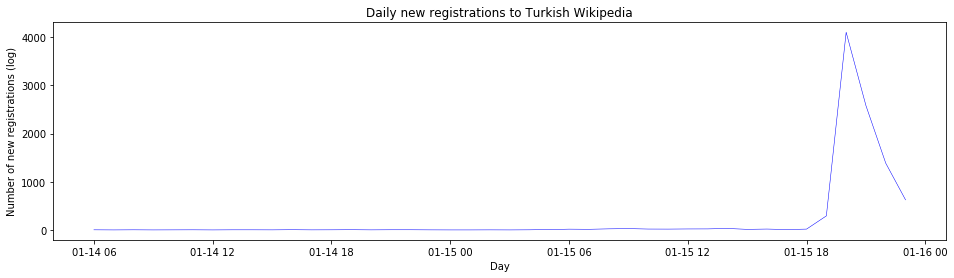

In [110]:
plt.figure(figsize=(16,4))
plt.title("Hourly new registrations to Turkish Wikipedia")
plt.plot(zoom_after_block['event_timestamp'].values, zoom_after_block['event_user_id'], color='blue', lw=0.5)
plt.ylabel("Number of new registrations ")
plt.xlabel("Day Hour")
plt.show()

In [113]:
zoom_after_block.tail(10)

,event_timestamp,event_user_id
32,2020-01-15 14:00:00+00:00,30
33,2020-01-15 15:00:00+00:00,12
34,2020-01-15 16:00:00+00:00,18
35,2020-01-15 17:00:00+00:00,8
36,2020-01-15 18:00:00+00:00,17
37,2020-01-15 19:00:00+00:00,291
38,2020-01-15 20:00:00+00:00,4102
39,2020-01-15 21:00:00+00:00,2579
40,2020-01-15 22:00:00+00:00,1385
41,2020-01-15 23:00:00+00:00,624


The block seems to have ended at 7pm on the 2020-01-15.

## Finding the beginning of the block

In [129]:
zoom_before_block = registrations[(registrations['event_timestamp'] > block_dates[0]-pd.Timedelta(days=3)) & (registrations['event_timestamp'] < block_dates[0]+pd.Timedelta(days=3)) ]
zoom_before_block = zoom_before_block.set_index('event_timestamp')
zoom_before_block = zoom_before_block.groupby(pd.Grouper(freq= 'H')).count().reset_index()

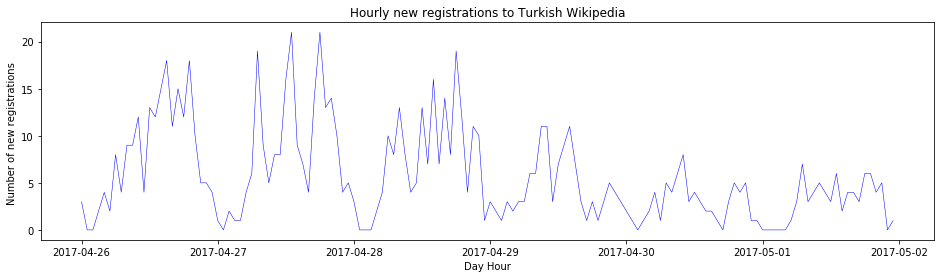

In [130]:
plt.figure(figsize=(16,4))
plt.title("Hourly new registrations to Turkish Wikipedia")
plt.plot(zoom_before_block['event_timestamp'].values, zoom_before_block['event_user_id'], color='blue', lw=0.5)
plt.ylabel("Number of new registrations ")
plt.xlabel("Day Hour")
plt.show()

In [145]:
zoom_before_block = edits[(edits['event_timestamp'] > block_dates[0]-pd.Timedelta(days=1)) & (edits['event_timestamp'] < block_dates[0]+pd.Timedelta(days=1)) ]
zoom_before_block = zoom_before_block.set_index('event_timestamp')
zoom_before_block = zoom_before_block.groupby(pd.Grouper(freq= 'H')).count().reset_index()

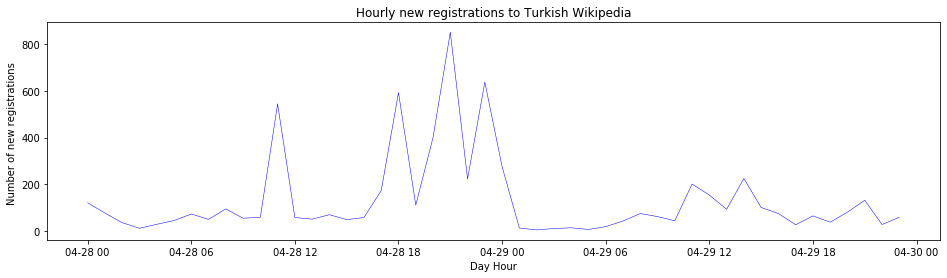

In [146]:
plt.figure(figsize=(16,4))
plt.title("Hourly new registrations to Turkish Wikipedia")
plt.plot(zoom_before_block['event_timestamp'].values, zoom_before_block['event_user_id'], color='blue', lw=0.5)
plt.ylabel("Number of new registrations ")
plt.xlabel("Day Hour")
plt.show()

In [618]:
block_dates = [pd.to_datetime('2017-04-29', utc = True), pd.to_datetime('2020-01-15 19:00', utc = True)]

In [619]:
edits['period'] = edits.apply(lambda row: 'pre-block' if row['event_timestamp'] < block_dates[0] else 'block' if not row['event_timestamp'] >= block_dates[1] else 'after-block', axis=1)
edits['period'] = edits['period'].astype("category")

# Characterize blocked users
## 1) Strict characterization
Consider a user is affected by the block if the user no longer posts during the block period

In [620]:
edits.columns

Index(['event_user_id', 'event_timestamp', 'page_id', 'page_revision_count',
       'revision_minor_edit', 'revision_text_bytes',
       'revision_is_identity_revert', 'period'],
      dtype='object')

In [241]:
preblock_edit_counts = edits[edits['period'] == 'pre-block'].groupby('event_user_id').agg(
        {'event_timestamp': ['min', 'max'],'revision_minor_edit': 'size'}).reset_index()

In [242]:
block_edit_counts = edits[edits['period'] == 'block'].groupby('event_user_id').agg(
        {'event_timestamp': ['min', 'max'],'revision_minor_edit': 'size'}).reset_index()

In [255]:
preblock_edit_counts.columns = ['user_id','first_edit_before_block', 'last_edit_before_block', 'number_of_edits']
block_edit_counts.columns = ['user_id', 'first_edit_during_block', 'last_edit_during_block', 'number_of_edits']

In [256]:
blocked_days = (block_dates[1] - block_dates[0]).days

In [257]:
users_during_block = set(block_edit_counts.user_id)

In [296]:
preblock_dates = np.arange(block_dates[0]-pd.Timedelta(days=365), block_dates[0], dtype='datetime64[D]')
user_activity = np.zeros(365)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  """Entry point for launching an IPython kernel.


In [297]:
for days in range(365):
    filtered_preblock_edit_counts = preblock_edit_counts[preblock_edit_counts['last_edit_before_block'] >=  block_dates[0]-pd.Timedelta(days=days+1)]
    active_users = set(filtered_preblock_edit_counts.user_id)
    user_activity[days] = len(active_users.intersection(users_during_block))/len(active_users)

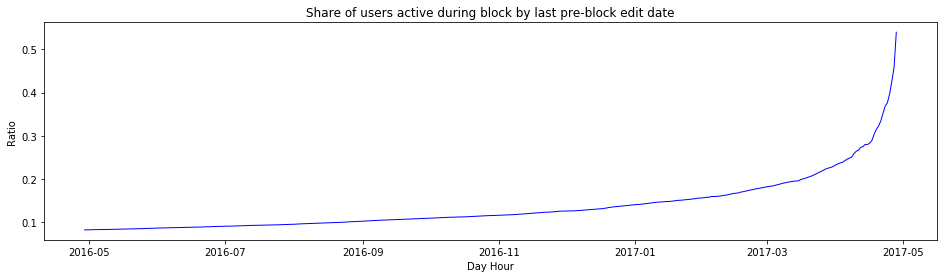

In [298]:
plt.figure(figsize=(16,4))
plt.title("Share of users active during block by last pre-block edit date")
plt.plot(preblock_dates[::-1], user_activity, color='blue', lw=1)
plt.ylabel("Ratio")
plt.xlabel("Day Hour")
plt.show()

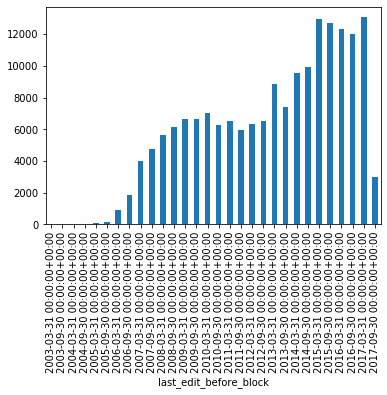

In [261]:
preblock_edit_counts.set_index('last_edit_before_block')['number_of_edits'].resample('6M').count().plot(kind="bar")

In [262]:
preblock_edit_counts['number_of_edits'].describe()

count    177341.000000
mean         36.809390
std        1502.967584
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max      427314.000000
Name: number_of_edits, dtype: float64

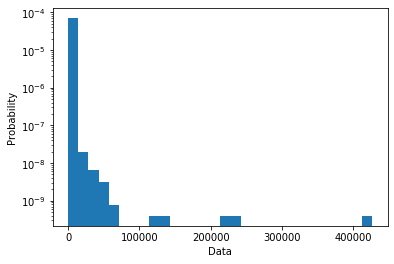

In [263]:
plt.hist(preblock_edit_counts['number_of_edits'], density=True, bins=30)  # density=False would make counts
plt.yscale('log', nonposy='clip')
plt.ylabel('Probability')
plt.xlabel('Data');

## Editor activity levels

In [454]:
preblock_edit_counts['edits_per_active_day'] = preblock_edit_counts['number_of_edits']/(1+(preblock_edit_counts['last_edit_before_block'] - preblock_edit_counts['first_edit_before_block']).dt.days)
preblock_edit_counts['edits_per_day'] = preblock_edit_counts['number_of_edits']/(1+(block_dates[0] - preblock_edit_counts['first_edit_before_block']).dt.days)

In [455]:
block_edit_counts['edits_per_day'] = block_edit_counts['number_of_edits']/((block_dates[1] - block_dates[0]).days)

In [456]:
preblock_edit_counts[preblock_edit_counts['last_edit_before_block'] >=  block_dates[0]-pd.Timedelta(days=900)].sort_values('edits_per_day', ascending=False)

,user_id,first_edit_before_block,last_edit_before_block,number_of_edits,edits_per_day,edits_per_active_day
115512,573665,2014-05-19 20:52:30+00:00,2017-04-28 21:16:47+00:00,223151,207.389405,207.389405
14760,90501,2007-06-01 13:23:34+00:00,2017-04-28 22:04:57+00:00,427314,118.042541,118.042541
43576,221544,2009-05-10 12:47:23+00:00,2017-04-28 19:06:33+00:00,238426,81.905187,81.905187
162031,882988,2016-06-25 17:39:57+00:00,2016-12-07 18:58:58+00:00,22224,72.155844,133.879518
164293,893615,2016-08-08 19:04:13+00:00,2017-04-28 23:00:36+00:00,12801,48.488636,48.488636
...,...,...,...,...,...,...
1955,10589,2007-05-17 16:25:50+00:00,2015-03-05 10:33:56+00:00,2,0.000550,0.000702
11976,73477,2007-03-15 16:55:29+00:00,2016-04-18 18:27:36+00:00,2,0.000541,0.000602
11168,67523,2007-02-20 17:57:29+00:00,2016-08-25 12:16:03+00:00,2,0.000537,0.000576
10959,65955,2007-02-13 07:33:45+00:00,2015-11-05 19:50:15+00:00,2,0.000536,0.000627


In [457]:
days_after_block = (edits['event_timestamp'].max()-block_dates[1]).days

In [458]:
active_preblock_editors = preblock_edit_counts[(preblock_edit_counts['last_edit_before_block'] >=  block_dates[0]-pd.Timedelta(days=30)) & (preblock_edit_counts['edits_per_day'] > 1)].sort_values('edits_per_day', ascending=False)

In [459]:
top_editors = pd.merge(active_preblock_editors, block_edit_counts, on = 'user_id', how='left')

In [462]:
import seaborn as sns

In [463]:
top_editors.edits_per_day_x.describe(percentiles=[0.75, 0.90, 0.95, 0.99])

count    319.000000
mean       5.587758
std       14.676185
min        1.004638
50%        2.598658
75%        5.023623
90%        9.274827
95%       14.165663
99%       47.020682
max      207.389405
Name: edits_per_day_x, dtype: float64

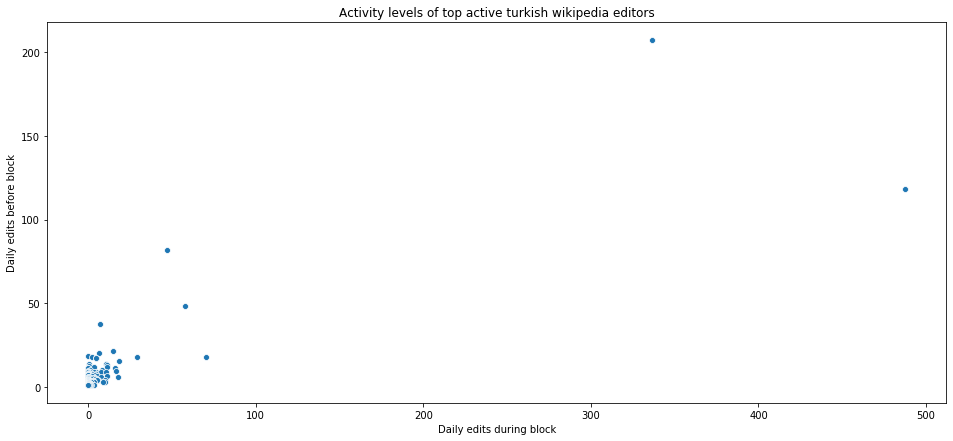

In [464]:
fig, ax = plt.subplots(figsize=(20,7))
ax.set_aspect('equal')
plt.title(f"Activity levels of top active turkish wikipedia editors")
sns.scatterplot(data=top_editors, x="edits_per_day_y", y="edits_per_day_x")
ax.set(xlabel='Daily edits during block', ylabel='Daily edits before block')
plt.show()

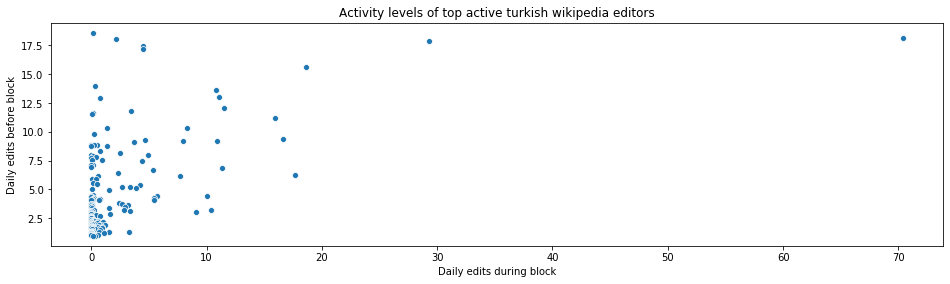

In [465]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_aspect('equal')
plt.title(f"Activity levels of top active turkish wikipedia editors")
sns.scatterplot(data=top_editors[top_editors['edits_per_day_x'] < 20], x="edits_per_day_y", y="edits_per_day_x")
ax.set(xlabel='Daily edits during block', ylabel='Daily edits before block')
plt.show()

In [466]:
top_editors.describe()

,user_id,number_of_edits_x,edits_per_day_x,edits_per_active_day,number_of_edits_y,edits_per_day_y
count,319.000000,319.000000,319.000000,319.000000,174.000000,174.000000
mean,647473.564263,8270.429467,5.587758,7.211913,7767.563218,7.838106
std,342372.828615,31323.096188,14.676185,15.110531,44885.512830,45.293151
min,464.000000,2.000000,1.004638,1.011204,1.000000,0.001009
25%,326632.000000,17.000000,1.616448,2.250517,24.000000,0.024218
50%,805755.000000,1095.000000,2.598658,3.666667,235.500000,0.237639
75%,958503.000000,6891.000000,5.023623,7.542118,2615.750000,2.639506
max,964234.000000,427314.000000,207.389405,207.389405,483274.000000,487.662967


In [472]:
bins = [0., 1., 5., 25., 99., 10000.]

In [473]:
top_editors['preblock_daily_edit_category'] = pd.cut(top_editors.edits_per_day_x, bins, right=False)
top_editors['block_daily_edit_category'] = pd.cut(top_editors.edits_per_day_y, bins, right=False)

In [478]:
edit_cats = pd.concat([top_editors.preblock_daily_edit_category.value_counts(dropna=False), top_editors.block_daily_edit_category.value_counts(dropna=False)], axis=1)

In [482]:
edit_cats= edit_cats.reset_index()

In [483]:
edit_cats.dtypes

index                           category
preblock_daily_edit_category     float64
block_daily_edit_category          int64
dtype: object

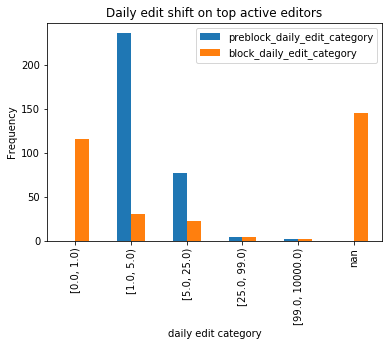

In [488]:
fig, ax = plt.subplots()
edit_cats.plot.bar(x='index', ax=ax)

# The following commands add labels to our figure.
plt.xlabel('daily edit category')
plt.ylabel('Frequency')
plt.title(f'Daily edit shift on top active editors')

plt.show()

## Analysing drop by user activity

In [509]:
daily_active_users = edits.set_index('event_timestamp').groupby(pd.Grouper(freq= 'D')).event_user_id.nunique()

In [522]:
daily_active_users = daily_active_users.reset_index()

In [524]:
daily_active_users = daily_active_users[daily_active_users['event_timestamp'] >= block_dates[0]-pd.Timedelta(days=days_after_block)]

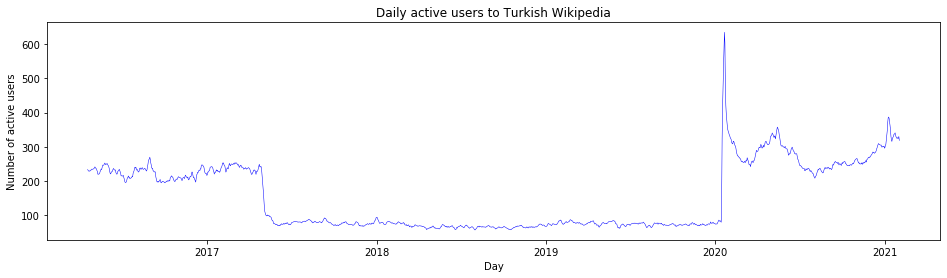

In [527]:
plt.figure(figsize=(16,4))
plt.title("Daily active users to Turkish Wikipedia")
rolling_mean = daily_active_users.rolling(window=7).mean()
plt.plot(daily_active_users.event_timestamp.values, rolling_mean, color='blue', lw=0.5)
plt.ylabel("Number of active users")
plt.xlabel("Day")
# for date in block_dates:
#     plt.axvline(date)
plt.show()

In [528]:
daily_active_users['period'] = daily_active_users.apply(lambda row: 'pre-block' if row['event_timestamp'] < block_dates[0] else 'block' if not row['event_timestamp'] >= block_dates[1] else 'after-block', axis=1)

In [530]:
daily_active_users.groupby('period').describe()

event_user_id                                                      \
                    count        mean        std    min    25%    50%     75%   
period                                                                          
after-block         383.0  283.352480  71.960530  188.0  246.5  271.0  308.00   
block               992.0   73.993952  19.797970   40.0   67.0   73.0   79.25   
pre-block           382.0  227.052356  23.258953  154.0  212.0  228.0  243.00   

                     
                max  
period               
after-block  1285.0  
block         607.0  
pre-block     311.0

Wikipedia lost nearly 75% of their daily active users due to the block.

In [537]:
preblock_edit_counts['preblock_daily_edit_category'] = pd.cut(preblock_edit_counts.edits_per_day, bins, right=False)

In [561]:
print(sorted(preblock_edit_counts.preblock_daily_edit_category.unique())[0])

[0.0, 1.0)


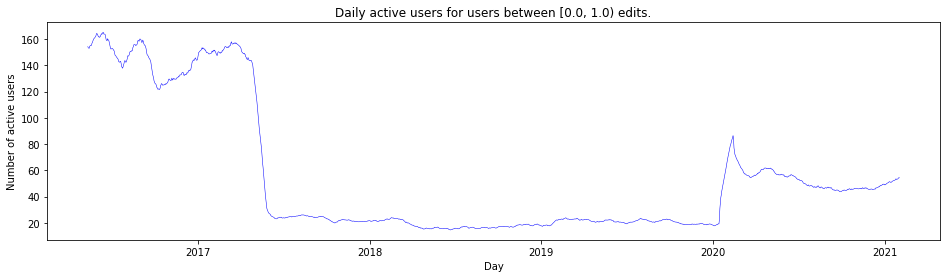

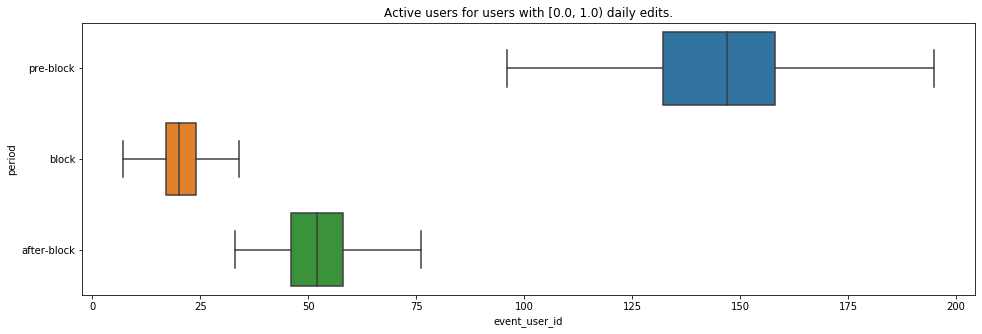

Activity change for [0.0, 1.0) users: -86.39455782312925%


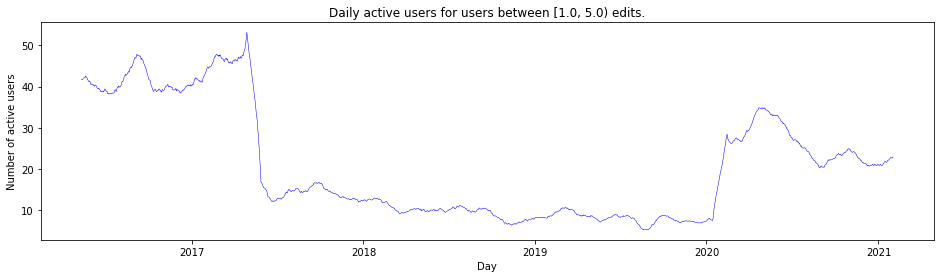

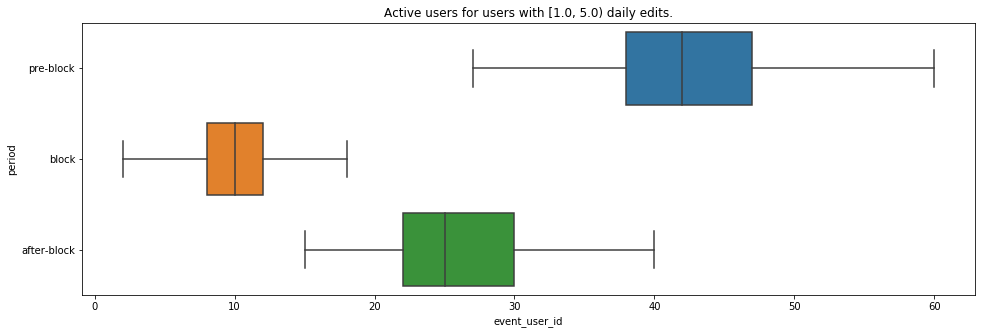

Activity change for [1.0, 5.0) users: -76.19047619047619%


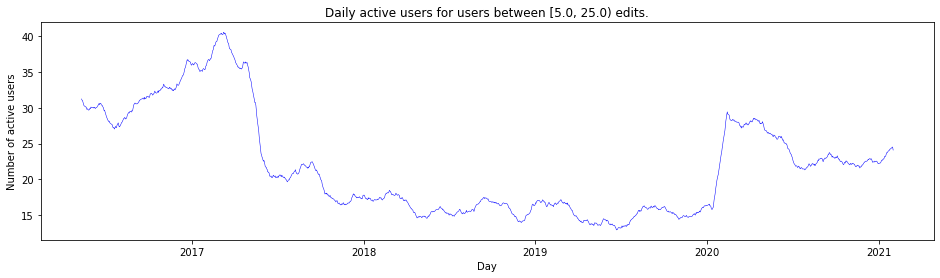

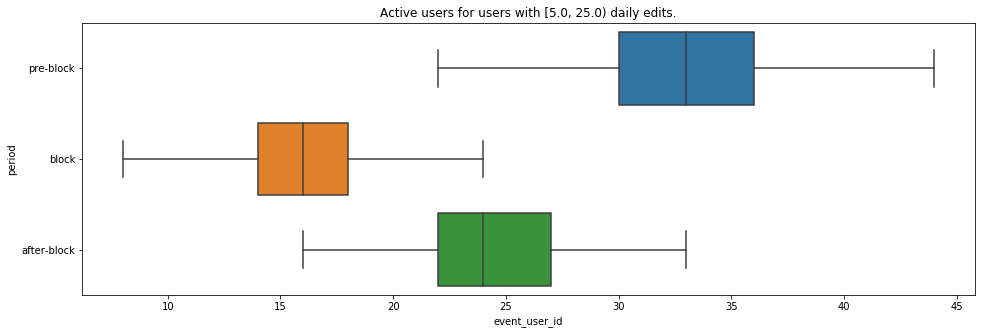

Activity change for [5.0, 25.0) users: -51.515151515151516%


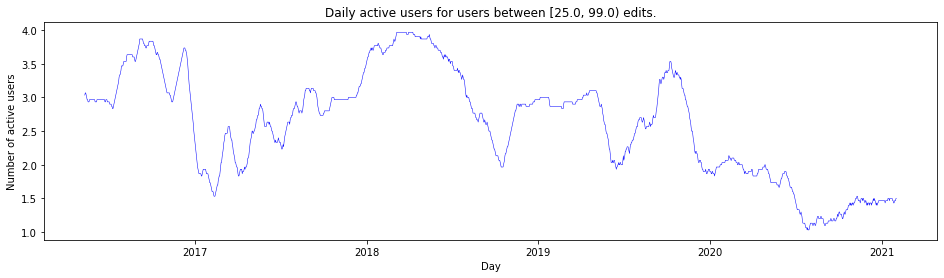

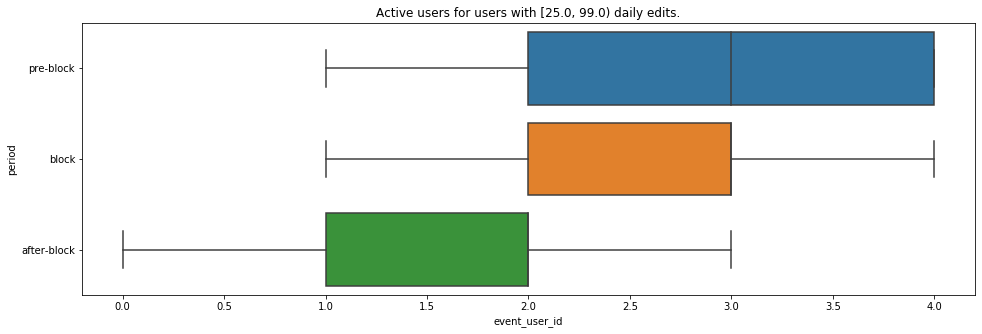

Activity change for [25.0, 99.0) users: 0.0%


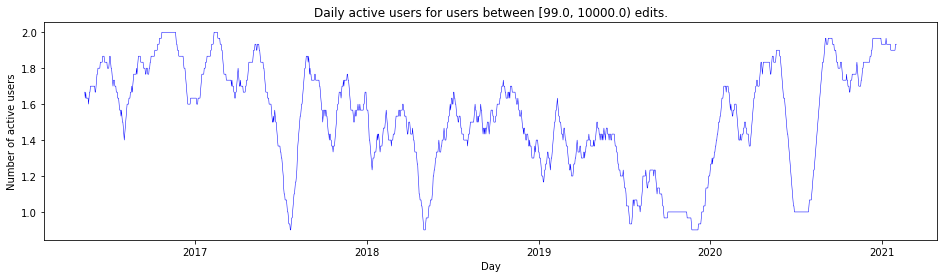

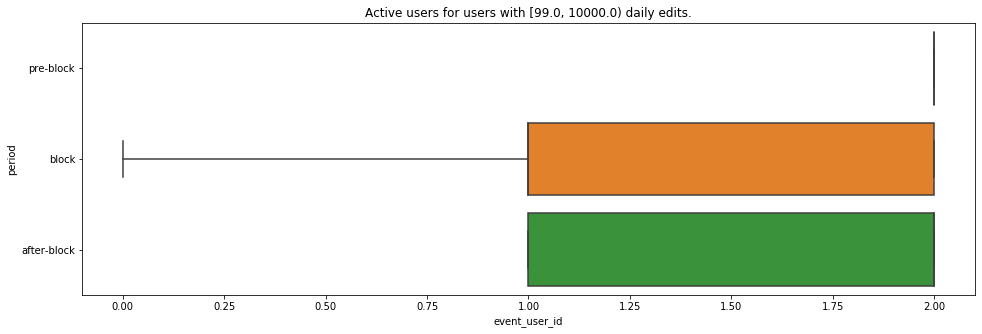

Activity change for [99.0, 10000.0) users: -50.0%


In [606]:
for category in sorted(preblock_edit_counts.preblock_daily_edit_category.unique()):
    category_users = preblock_edit_counts[preblock_edit_counts['preblock_daily_edit_category'] == category].user_id
    plt.figure(figsize=(16,4))
    plt.title(f"Daily active users for users between {category} edits.")
    df = edits[(edits['event_timestamp'] >= block_dates[0]-pd.Timedelta(days=days_after_block))&(edits.event_user_id.isin(category_users))].set_index('event_timestamp').groupby(pd.Grouper(freq= 'D')).event_user_id.nunique().reset_index()
    rolling_mean = df.rolling(window=30).mean()
    plt.plot(df.event_timestamp.values, rolling_mean, color='blue', lw=0.5)
    plt.ylabel("Number of active users")
    plt.xlabel("Day")
    # for date in block_dates:
    #     plt.axvline(date)
    plt.show()
    
    
    df['period'] = df.apply(lambda row: 'pre-block' if row['event_timestamp'] < block_dates[0] else 'block' if not row['event_timestamp'] >= block_dates[1] else 'after-block', axis=1)
    
    groups = df.groupby('period')
    periods = pd.concat([pd.DataFrame(x[1]['event_user_id'].values) for x in groups], axis=1)
    periods = pd.DataFrame(periods)
    periods.columns = range(1,4)
    fig, ax = plt.subplots()
    plt.title(f"Active users for users with {category} daily edits.")
    fig.set_size_inches(16, 5)
    plt.xlabel('Daily Active users')
    ax = sns.boxplot(y="period", x="event_user_id", data=df,  showfliers=False)
    plt.show()
    
    medians = groups.median()
    
    print(f"Activity change for {category} users: {100*(medians.values[1].item() - medians.values[2].item())/(medians.values[2].item())}%")

# Community graph


In [491]:
import networkx as nx

In [621]:
edits.head()

,event_user_id,event_timestamp,page_id,page_revision_count,revision_minor_edit,revision_text_bytes,revision_is_identity_revert,period
1,1,2002-12-05 22:54:39+00:00,5,1.0,False,24,False,pre-block
14,6,2003-03-13 16:30:04+00:00,10,1.0,False,8540,False,pre-block
51,13,2003-08-02 01:08:44+00:00,24,1.0,False,257,False,pre-block
52,13,2003-08-02 01:10:08+00:00,24,2.0,False,259,False,pre-block
53,13,2003-08-02 01:11:50+00:00,24,3.0,False,261,False,pre-block


In [625]:
print(f"Number of distinct editors : {len(edits.event_user_id.unique())}")

Number of distinct editors : 212768


## Preblock graph (filtered to a similar time period as the block period)

In [825]:
preblock_edits = edits[(edits['period'] == 'pre-block') & (edits['event_timestamp'] > block_dates[0]-pd.Timedelta(days=blocked_days))]

In [640]:
preblock_edits = preblock_edits.groupby('event_user_id')['page_id'].apply(set)

In [657]:
preblock_edits = preblock_edits.reset_index()

In [646]:
preblock_adjacency = np.zeros((preblock_edits.shape[0], preblock_edits.shape[0]))

In [662]:
for i, elem1 in preblock_edits.page_id.iteritems():
    for j, elem2 in preblock_edits.page_id.iteritems():
        if i > j:
            intersection = len(elem1.intersection(elem2))
            preblock_adjacency[i,j] = intersection
            preblock_adjacency[j,i] = intersection

In [684]:
preblock_graph = nx.from_numpy_array(preblock_adjacency)

In [685]:
nx.write_gexf(preblock_graph, 'preblock_graph.gexf')

In [686]:
print('Number of nodes: {}, Number of edges: {}'. format(preblock_graph.number_of_nodes(), preblock_graph.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(nx.number_of_selfloops(preblock_graph), nx.number_connected_components(preblock_graph)))

Number of nodes: 68827, Number of edges: 2326737
Number of self-loops: 0, Number of connected components: 5367


In [699]:
giant_preblock = preblock_graph.subgraph(max(nx.connected_components(preblock_graph), key=len))
print('The giant component of the preblock graph has {} nodes and {} edges.'.format(giant_preblock.number_of_nodes(), giant_preblock.size()))

The giant component of the preblock graph has 63390 nodes and 2326653 edges.


In [717]:
print(f'The clustering coefficient of the preblock graph is {nx.average_clustering(preblock_graph)}')

KeyboardInterrupt: 

## Block Period Graph

In [814]:
block_edits.groupby('event_user_id').size().value_counts()

1       5612
2       2348
3       1198
4        737
5        489
        ... 
188        1
180        1
164        1
148        1
1567       1
Length: 356, dtype: int64

In [813]:
block_edits = edits[(edits['period'] == 'block')]

In [664]:
block_edits = block_edits.groupby('event_user_id')['page_id'].apply(set)

In [665]:
block_edits = block_edits.reset_index()

In [666]:
block_adjacency = np.zeros((block_edits.shape[0], block_edits.shape[0]))

In [671]:
for i, elem1 in block_edits.page_id.iteritems():
    for j, elem2 in block_edits.page_id.iteritems():
        if i > j:
            intersection = len(elem1.intersection(elem2))
            block_adjacency[i,j] = intersection
            block_adjacency[j,i] = intersection

In [702]:
block_graph =  nx.from_numpy_array(block_adjacency)

In [703]:
nx.write_gexf(block_graph, 'block_graph.gexf')

In [704]:
print('Number of nodes: {}, Number of edges: {}'. format(block_graph.number_of_nodes(), block_graph.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(nx.number_of_selfloops(block_graph), nx.number_connected_components(block_graph)))


Number of nodes: 13119, Number of edges: 130517
Number of self-loops: 0, Number of connected components: 1026


In [706]:
giant_block = block_graph.subgraph(max(nx.connected_components(block_graph), key=len))
print('The giant component of the block graph has {} nodes and {} edges.'.format(giant_block.number_of_nodes(), giant_block.size()))

The giant component of the block graph has 12085 nodes and 130508 edges.


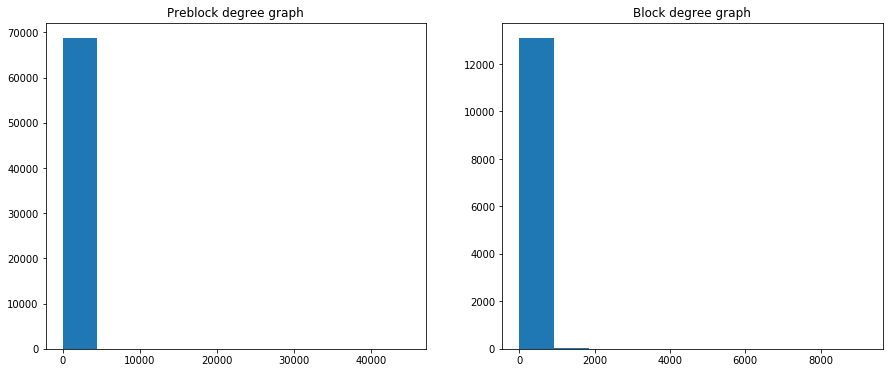

In [709]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title('Preblock degree graph')
preblock_degrees = [degree for node, degree in preblock_graph.degree()]
axes[0].hist(preblock_degrees);
axes[1].set_title('Block degree graph')
block_degrees = [degree for node, degree in block_graph.degree()]
axes[1].hist(block_degrees);

In [ ]:
print(f'The clustering coefficient of the block graph is {nx.average_clustering(block_graph)}')

## Find out if those who remained were a subcommunity of the pre-block graph

In [723]:
users_who_remained = list(set(preblock_edits.event_user_id.values).intersection(set(block_edits.event_user_id.values)))

In [728]:
users_who_remained_idx = preblock_edits[preblock_edits['event_user_id'].isin(users_who_remained)].index.values

In [760]:
users_who_left_idx = list(preblock_edits[~preblock_edits['event_user_id'].isin(users_who_remained)].index.values)

In [732]:
unaffected_community = nx.subgraph(preblock_graph, users_who_remained_idx)
rest_of_graph = nx.subgraph(preblock_graph, users_who_left_idx)

### 1) Strong community
The subgraph V is a community in a strong sense if each node has more connections within the community than with the rest of the graph. 

### 2) Weak community
The subgraph V is a community in a weak sense if the sum of all degrees within V is larger than the sum of all degrees toward the rest of the network.

In [743]:
degrees_within_community = sum(dict(unaffected_community.degree()).values())

In [776]:
degrees_to_the_rest = 0
for user_idx in users_who_remained_idx:
    user_and_rest = users_who_left_idx.copy()
    user_and_rest.append(user_idx)
    rest_of_network = nx.subgraph(preblock_graph, user_and_rest)
    degrees_to_the_rest += nx.degree(rest_of_network, user_idx)

In [777]:
degrees_to_the_rest

1123868

In [778]:
degrees_within_community

201302

The users who remained do not form a strong or weak community inside the pre-block network. It is possible that the timeframe that we took for the pre-block period is too much. We took a symmetrical period to the pre-block period, the block lasted 991 days, but a lot of the users in the pre-block period already left wikipedia a long time ago. The sum of degrees within the users who remained is 5 times smaller than the degrees to the rest of the network whilst there are 23 times more users outside the community than inside.

In [784]:
users_who_remained_idx.shape[0], len(users_who_left_idx)

(2888, 65939)

In [788]:
1123868/201302

5.582994704473875

In [789]:
65939/2888

22.832063711911356

### Use community algorithms and check if users who remained are in it

#### Centrality based - Girvan Newman

In [792]:
from networkx.algorithms import community
girvan_newman_communities_generator = community.girvan_newman(preblock_graph)
top_level_communities = next(girvan_newman_communities_generator)

#### Modularity based

##### Weighted

In [ ]:
modularity_communities_generator = community._naive_greedy_modularity_communities(preblock_graph)
top_level_communities = next(modularity_communities_generator)


##### Unweighted

In [805]:
uw_modularity_communities_generator = community.greedy_modularity_communities(preblock_graph)
top_level_communities = next(uw_modularity_communities_generator)


KeyboardInterrupt: 

# Implementing measures of the Romero paper

## Shock level
Given an article a, we define the weighted
blocked ratio $B_a$ of article a as the fraction of edits contributed
by the editors blocked among all the edits during
the pre-block period.

In [826]:
preblock_edits = edits[(edits['period'] == 'pre-block') & (edits['event_timestamp'] > block_dates[0]-pd.Timedelta(days=blocked_days))]

In [827]:
block_edits = edits[(edits['period'] == 'block')]

In [828]:
users_who_remained = list(set(preblock_edits.event_user_id.values).intersection(set(block_edits.event_user_id.values)))

In [829]:
users_who_left = list(set(preblock_edits.event_user_id.values).difference(set(block_edits.event_user_id.values)))

In [833]:
from tqdm import tqdm

In [834]:
tqdm.pandas()

/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [845]:
preblock_edits['blocked_user'] = preblock_edits['event_user_id'].isin(users_who_left)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [859]:
all_pages = preblock_edits.groupby(['page_id']).size().reset_index()

In [857]:
blocked_user_pages = preblock_edits[preblock_edits['blocked_user'] == True].groupby(['page_id']).size().reset_index()

In [861]:
shock_level = pd.merge(all_pages, blocked_user_pages, on = 'page_id', how = 'left')

In [863]:
shock_level.columns = ['page_id', 'all_edits_count', 'blocked_user_edits_count']

In [864]:
shock_level = shock_level.fillna(0)

In [865]:
shock_level['blocked_ratio'] = shock_level['blocked_user_edits_count']/shock_level['all_edits_count']

In [869]:
shock_level.head()

,page_id,all_edits_count,blocked_user_edits_count,blocked_ratio
0,5,2,1.0,0.500000
1,10,247,74.0,0.299595
2,16,2,0.0,0.000000
3,22,56,21.0,0.375000
4,24,90,58.0,0.644444


In [868]:
shock_level.to_csv(f"{DATA_PATH}/processed_data/shock_level.csv")

## Level of Activity
For each article a, we let $EV^{pre}_a$ and $EV^{post}_a$ be the number of edits of a made during the pre-block
period and block period, respectively. <br>
Then, $EV^Δ_a = \frac{EV^{post}_a −EV^{pre}_a}{EV^{pre}_a}$

In [876]:
level_of_activity = pd.merge(preblock_edits[['page_id']].groupby('page_id').size().reset_index().rename(columns={0: "preblock_edit_count"}), block_edits[['page_id']].groupby('page_id').size().reset_index().rename(columns={0: "block_edit_count"}), on='page_id', how='outer')

In [878]:
level_of_activity = level_of_activity[~level_of_activity['preblock_edit_count'].isna()]

In [880]:
level_of_activity = level_of_activity.fillna(0)

In [881]:
level_of_activity['delta'] = (level_of_activity['block_edit_count'] - level_of_activity['preblock_edit_count'])/(level_of_activity['preblock_edit_count'])

In [882]:
level_of_activity.to_csv(f"{DATA_PATH}/processed_data/level_of_activity.csv")

## Centralization
We let $E^{pre}_a$ and $E^{post}_a$ be the set of editors of article a in the pre-block and post-block period, respectively, and $N^{pre}_a$ and $N^{post}_a$ be the number of editors in $E^{pre}_a$ and $E^{post}_a$ . We let $W^{pre}_a (e)$ and $W^{post}_a (e)$ be the number of times editor e contributed to article a in the respective time periods. We begin by computing the $G^{pre}_a$ , the Gini coefficient of the set ${\bigcup_{e \in E^{pre}_a} W^{pre}_a (e)}$: <br>
$G^{pre}_a = \frac{ \sum_{i \in E^{pre}_a} \sum_{j \in E^{pre}_a}|e_i−e_j|}{2\sum_{i∈E^{pre}_a}\sum_{j∈E^{pre}_a}e_j}$

We define the centralization of article a during the pre-block period, $C^{pre}_a$  , as the fraction of $G^{pre}_a$ and the maximum value of $G_a$ given $E^{pre}_a$ and $EV^{pre}_a$ . We also define the corresponding measures of centralization of an article during the post-block period in the same manner. Finally, we define the change in centralization as $C^Δ_a=C^{post}_a −C^{pre}_a $.

In [904]:
from collections import Counter

In [905]:
eprea = preblock_edits.groupby('page_id')['event_user_id'].apply(list).apply(Counter)

In [906]:
eposta = block_edits.groupby('page_id')['event_user_id'].apply(list).apply(Counter)

In [907]:
gini = pd.merge(eprea.reset_index(), eposta.reset_index(), on = 'page_id', how = 'outer')

In [908]:
gini.columns = ['page_id', 'eprea', 'eposta']

In [963]:
def calculate_gini(c):
    if(pd.notnull(c)):
        values = list(c.values())
        num = 0
        denom = 0

        for i in values:
            for j in values:
                num += abs(i-j)
                denom += j
        return num/(2*denom)


In [977]:
len(c.keys())

2

In [964]:
from tqdm import tqdm
tqdm.pandas()

In [966]:
gini['gprea'] = gini['eprea'].apply(calculate_gini)
gini['gposta'] = gini['eposta'].apply(calculate_gini)

In [967]:
gini

,page_id,eprea,eposta,gprea,gposta
0,5,"{800643: 1, 113659: 1}",NaN,0.000000,NaN
1,10,"{223619: 2, 464885: 2, 400394: 1, 650845: 1, 6...","{208697: 3, 573665: 6, 104002: 1, 880664: 1, 3...",0.625091,0.335979
2,16,"{93111: 1, 96765: 1}",NaN,0.000000,NaN
3,22,"{248688: 1, 5516: 1, 416618: 1, 673356: 1, 536...","{748781: 3, 573665: 2, 90501: 1}",0.470497,0.222222
4,24,"{365127: 29, 166490: 11, 626925: 1, 642240: 2,...","{573665: 2, 136954: 1, 221544: 1, 86010: 1, 10...",0.562007,0.260000
...,...,...,...,...,...
453997,2607910,NaN,{996784: 1},NaN,0.000000
453998,2616902,NaN,{90501: 1},NaN,0.000000
453999,2625246,NaN,"{90501: 1, 136954: 1}",NaN,0.000000
454000,2648641,NaN,{90501: 1},NaN,0.000000


In [975]:
gini['evprea'] = gini['eprea'].apply(lambda c: sum(c.values()) if(pd.notnull(c)) else 0)
gini['evposta'] = gini['eposta'].apply(lambda c: sum(c.values()) if(pd.notnull(c)) else 0)

In [978]:
gini['nprea'] = gini['eprea'].apply(lambda c: len(c.keys()) if(pd.notnull(c)) else 0)
gini['nposta'] = gini['eposta'].apply(lambda c: len(c.keys()) if(pd.notnull(c)) else 0)

In [979]:
gini

,page_id,eprea,eposta,gprea,gposta,evprea,evposta,nprea,nposta
0,5,"{800643: 1, 113659: 1}",NaN,0.000000,NaN,2,0,2,0
1,10,"{223619: 2, 464885: 2, 400394: 1, 650845: 1, 6...","{208697: 3, 573665: 6, 104002: 1, 880664: 1, 3...",0.625091,0.335979,247,27,78,14
2,16,"{93111: 1, 96765: 1}",NaN,0.000000,NaN,2,0,2,0
3,22,"{248688: 1, 5516: 1, 416618: 1, 673356: 1, 536...","{748781: 3, 573665: 2, 90501: 1}",0.470497,0.222222,56,6,23,3
4,24,"{365127: 29, 166490: 11, 626925: 1, 642240: 2,...","{573665: 2, 136954: 1, 221544: 1, 86010: 1, 10...",0.562007,0.260000,90,15,31,10
...,...,...,...,...,...,...,...,...,...
453997,2607910,NaN,{996784: 1},NaN,0.000000,0,1,0,1
453998,2616902,NaN,{90501: 1},NaN,0.000000,0,1,0,1
453999,2625246,NaN,"{90501: 1, 136954: 1}",NaN,0.000000,0,2,0,2
454000,2648641,NaN,{90501: 1},NaN,0.000000,0,1,0,1


In [1000]:
def max_gini(ev, n):
    if n>0:
        return (n-1)*(ev-n)/(ev*n)

In [1008]:
gini['max_pre_gini'] = gini[['evprea', 'nprea']].apply(lambda row: max_gini(row['evprea'], row['nprea']), axis=1)

In [1009]:
gini['max_post_gini'] = gini[['evposta', 'nposta']].apply(lambda row: max_gini(row['evposta'], row['nposta']), axis=1)

In [1014]:
gini

,page_id,eprea,eposta,gprea,gposta,evprea,evposta,nprea,nposta,max_pre_gini,max_post_gini
0,5,"{800643: 1, 113659: 1}",NaN,0.000000,NaN,2,0,2,0,0.000000,NaN
1,10,"{223619: 2, 464885: 2, 400394: 1, 650845: 1, 6...","{208697: 3, 573665: 6, 104002: 1, 880664: 1, 3...",0.625091,0.335979,247,27,78,14,0.675439,0.447090
2,16,"{93111: 1, 96765: 1}",NaN,0.000000,NaN,2,0,2,0,0.000000,NaN
3,22,"{248688: 1, 5516: 1, 416618: 1, 673356: 1, 536...","{748781: 3, 573665: 2, 90501: 1}",0.470497,0.222222,56,6,23,3,0.563665,0.333333
4,24,"{365127: 29, 166490: 11, 626925: 1, 642240: 2,...","{573665: 2, 136954: 1, 221544: 1, 86010: 1, 10...",0.562007,0.260000,90,15,31,10,0.634409,0.300000
...,...,...,...,...,...,...,...,...,...,...,...
453997,2607910,NaN,{996784: 1},NaN,0.000000,0,1,0,1,NaN,0.000000
453998,2616902,NaN,{90501: 1},NaN,0.000000,0,1,0,1,NaN,0.000000
453999,2625246,NaN,"{90501: 1, 136954: 1}",NaN,0.000000,0,2,0,2,NaN,0.000000
454000,2648641,NaN,{90501: 1},NaN,0.000000,0,1,0,1,NaN,0.000000


In [1015]:
gini['normalized_gprea'] = gini[['gprea', 'max_pre_gini']].apply(lambda row: row['gprea']/row['max_pre_gini'], axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [1017]:
gini['normalized_gposta'] = gini[['gposta', 'max_post_gini']].apply(lambda row: row['gposta']/row['max_post_gini'], axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [1019]:
gini['cdelta'] = gini['normalized_gposta'] - gini['normalized_gprea']

In [1022]:
gini.to_csv(f'{DATA_PATH}/processed_data/gini.csv')